## K-means Clustering
LSSTC-DSFP Session 2 Final Project 

Eve Chase and George Vejar

# Divide and Conquer Your Data
 - Divide data into k clusters
 - Clusters described by their centroids
 - Objects are associated to closest centroid

# Center your Centroid
 - Centroids can be randomly chosen but it helps to have a good starting point
 - Centroids will shift based on the data per iteration and grow the clusters
 
 <img src="centroid_plot.png">

# Using Kmeans

In [2]:
from sklearn.cluster import KMeans

K = KMeans()
#(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')


# Varying Inputs
 - n_clusters: Probably the most important input and downfall of Kmeans, you have to know how many clusters you want
 - init: Option for initializing centroids, can be random, or an array of points, standard is supposed to be quick and smart
 - n_init: Number of times kmeans runs with different centroid seed (more is better it seems)
 - tol: tolerance for declaring convergence
 - n_jobs: number of jobs to run in parallel

# Fitting and Predicting
- K.fit(X) to fit data
- K.labels_ shows the labels it came up with for the data
- K.predict(X_new) to classify new data with model
- K.cluster centers_ gives the positions of the cluster centers which can be helpful to plot for visualization

# Pitfalls?
- Kmeans can get stuck in local minima
- Sensitive to the number of clusters and the cluster initial positions
- One way to help with this is to repeat it several times
- Cross validate to see how your model is doing

## Improvements to `scikit-learn`



<img src="scikit_total.png">

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py



In [3]:
import matplotlib

In [4]:
matplotlib.__version__

'2.0.0'

In [5]:
import sklearn
sklearn.__version__

'0.18.1'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd


from sklearn.cluster import KMeans
from sklearn import datasets

In [7]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
#iris = sns.load_dataset("iris")
X = iris.data
y = iris.target

#estimators = {'k_means_iris_3': KMeans(n_clusters=3)} #,
             # 'k_means_iris_8': KMeans(n_clusters=8),
             # 'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
             #                                 init='random')}

In [8]:
# 3 Clusters
est3 = KMeans(n_clusters=3)
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

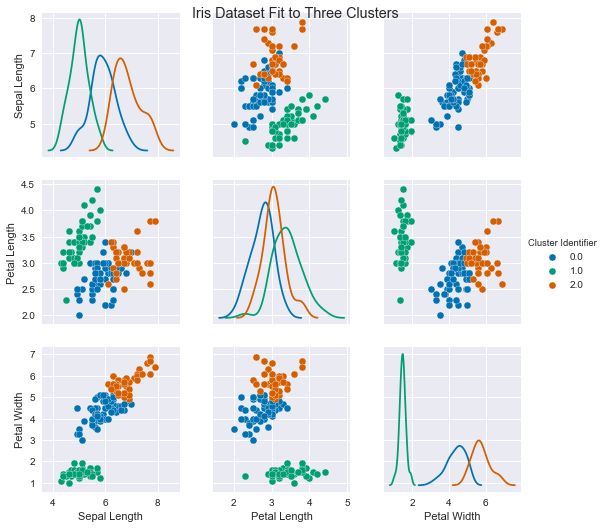

In [9]:
plt.figure(1, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['Sepal Length', 'Petal Length', 'Petal Width',
                                          'Cluster Identifier'])
bigplot = sns.pairplot(fit_data, vars=['Sepal Length', 'Petal Length', 'Petal Width'], 
                       hue='Cluster Identifier', diag_kind='kde', palette='colorblind')
bigplot.fig.suptitle('Iris Dataset Fit to Three Clusters')
plt.show()

In [10]:
#  8 Clusters
est3 = KMeans(n_clusters=8)
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

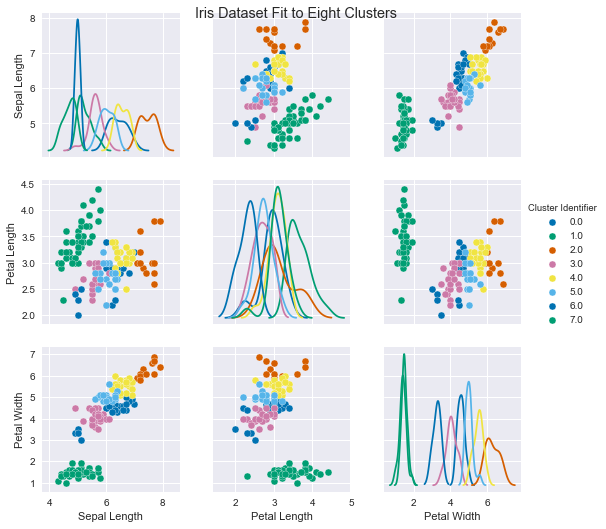

In [11]:
plt.figure(2, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['Sepal Length', 'Petal Length', 'Petal Width',
                                          'Cluster Identifier'])
bigplot = sns.pairplot(fit_data, vars=['Sepal Length', 'Petal Length', 'Petal Width'], 
                       hue='Cluster Identifier', diag_kind='kde', palette='colorblind')
bigplot.fig.suptitle('Iris Dataset Fit to Eight Clusters')
plt.show()

## Recreating the "Bad Init" Run

In the original `scikit-learn` plot, a three-cluster model is shown with a different initialization set. Here, we change `n_init` to one and `init` to `random`, resulting in only one run of the k-means algorithm, with clusters run at random. Does this look different?

In [14]:
# 3 Clusters with "bad init"
est3 = KMeans(n_clusters=3, n_init=1, init='random')
est3.fit(X)
labels = est3.labels_
 
X_labels = []
for i, line in enumerate(X):
    X_labels.append([line[0], line[1], line[2], labels[i]])
X_labels = np.asarray(X_labels)

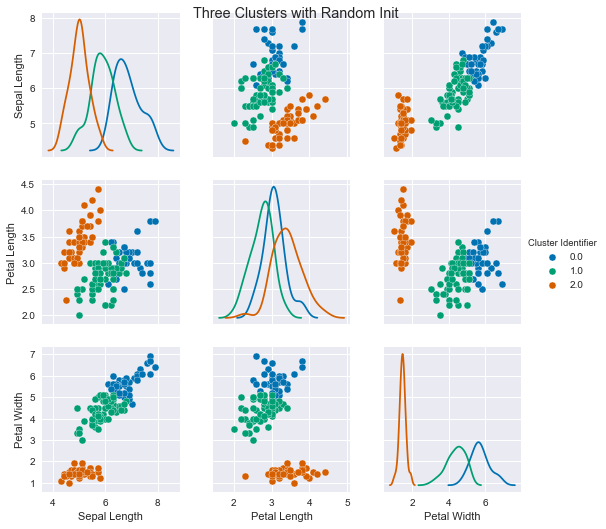

In [15]:
plt.figure(3, figsize=(12, 9))
fit_data = pd.DataFrame(X_labels, columns=['Sepal Length', 'Petal Length', 'Petal Width',
                                          'Cluster Identifier'])
bigplot = sns.pairplot(fit_data, vars=['Sepal Length', 'Petal Length', 'Petal Width'], 
                       hue='Cluster Identifier', diag_kind='kde', palette='colorblind')
bigplot.fig.suptitle('Three Clusters with Random Init')
plt.show()

## Summary

* `scikit-learn` did not clearly represent the data
* 3D plots are generally a bad way to represent data
* Use `seaborn` to generate pairplots
* The four plots shown in the `scikit-learn` image are not ideal for demonstrating changes in the data
    * Almost no difference between the three-cluster plots